In [177]:
import numpy as np
import pandas as pd 
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split
from keras.initializers import Orthogonal ,RandomNormal ,VarianceScaling
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from matplotlib import pyplot as plt
import seaborn as sns
import math
import numpy.linalg as m
%matplotlib inline

In [15]:

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

num_sample = 200000
dim = 2 
data_mat = np.zeros((num_sample,dim,dim))
for idx in range(0,num_sample):
    a = np.random.randint(1,10,(dim,dim))
    data_mat[idx] = np.dot(np.transpose(a),a)
data_mat = data_mat/200
data_mat = data_mat.reshape((num_sample,dim*dim))
train_x,test_x= train_test_split(data_mat,test_size=0.1,random_state=42)
del data_mat
print("shape of train is {}".format(train_x.shape))

shape of train is (180000, 4)


In [103]:
def build_model():
    input_mat = Input(shape=(4,))
    
    encoded = Dense(8, activation='relu')(input_mat)
    encoded = Dense(8, activation='relu')(encoded)    
    encoded = Dense(4, activation='relu')(encoded)
    encoded = Dense(4, activation='relu')(encoded)
    encoded = Dense(2, activation='relu')(encoded)
        
    
    encoded = Dense(1, activation='relu')(encoded)

    
    decoded = Dense(2, activation='relu')(encoded)
    decoded = Dense(4, activation='relu')(decoded)
    decoded = Dense(4, activation='relu')(decoded)
    decoded = Dense(8, activation='relu')(decoded)
    decoded = Dense(8, activation='relu')(decoded)
    
    decoded = Dense(4, activation='linear')(decoded)
    
    encoder = Model(input_mat, encoded)
    autoencoder = Model(input_mat, decoded)
    
    
    return autoencoder,encoder

def step_decay(epoch, lr):
    # initial_lrate = 1.0 # no longer needed
    drop = 0.5
    epochs_drop = 2.0
    lrate = lr * math.pow(drop, 
    math.floor((1+epoch)/epochs_drop))
    return lrate

def train_model(epochs,verbose):
    from numpy.random import seed
    seed(1)
    from tensorflow import set_random_seed
    set_random_seed(2)
    
    _autoencoder,_encoder = build_model()
    #lrate = LearningRateScheduler(step_decay)
    #callback_list = [lrate]
    #opt = Adam(lr=0.0, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00, amsgrad=False)
    _autoencoder.compile(optimizer='adam', loss='mse',metrics=['acc'])
    history = _autoencoder.fit(train_x, train_x,
                    epochs=epochs,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(test_x, test_x),verbose = verbose)
    
    return history ,  _encoder

In [132]:
history1 , encoder = train_model(epochs=304,verbose = 1)

Train on 180000 samples, validate on 20000 samples
Epoch 1/304
180000/180000 [==============================] - 10s 56us/step - loss: 0.0189 - acc: 0.4559 - val_loss: 0.0098 - val_acc: 0.5153
Epoch 2/304
180000/180000 [==============================] - 10s 54us/step - loss: 0.0095 - acc: 0.5022 - val_loss: 0.0097 - val_acc: 0.4910
Epoch 3/304
180000/180000 [==============================] - 9s 49us/step - loss: 0.0095 - acc: 0.4996 - val_loss: 0.0097 - val_acc: 0.5061
Epoch 4/304
180000/180000 [==============================] - 7s 40us/step - loss: 0.0095 - acc: 0.5031 - val_loss: 0.0097 - val_acc: 0.5335
Epoch 5/304
180000/180000 [==============================] - 10s 57us/step - loss: 0.0094 - acc: 0.5380 - val_loss: 0.0096 - val_acc: 0.5589
Epoch 6/304
180000/180000 [==============================] - 11s 59us/step - loss: 0.0093 - acc: 0.5749 - val_loss: 0.0093 - val_acc: 0.6040
Epoch 7/304
180000/180000 [==============================] - 10s 57us/step - loss: 0.0086 - acc: 0.6421 -

Epoch 116/304
180000/180000 [==============================] - 8s 47us/step - loss: 0.0044 - acc: 0.8154 - val_loss: 0.0045 - val_acc: 0.8159
Epoch 117/304
180000/180000 [==============================] - 9s 49us/step - loss: 0.0044 - acc: 0.8161 - val_loss: 0.0047 - val_acc: 0.8176
Epoch 118/304
180000/180000 [==============================] - 9s 50us/step - loss: 0.0044 - acc: 0.8185 - val_loss: 0.0045 - val_acc: 0.8226
Epoch 119/304
180000/180000 [==============================] - 10s 55us/step - loss: 0.0043 - acc: 0.8227 - val_loss: 0.0042 - val_acc: 0.8274
Epoch 120/304
180000/180000 [==============================] - 9s 51us/step - loss: 0.0041 - acc: 0.8274 - val_loss: 0.0042 - val_acc: 0.8265
Epoch 121/304
180000/180000 [==============================] - 10s 54us/step - loss: 0.0041 - acc: 0.8286 - val_loss: 0.0042 - val_acc: 0.8309
Epoch 122/304
180000/180000 [==============================] - 10s 54us/step - loss: 0.0041 - acc: 0.8281 - val_loss: 0.0042 - val_acc: 0.8285
Epo

Epoch 231/304
180000/180000 [==============================] - 9s 53us/step - loss: 0.0037 - acc: 0.8640 - val_loss: 0.0042 - val_acc: 0.8650
Epoch 232/304
180000/180000 [==============================] - 9s 52us/step - loss: 0.0036 - acc: 0.8525 - val_loss: 0.0037 - val_acc: 0.8506
Epoch 233/304
180000/180000 [==============================] - 10s 53us/step - loss: 0.0036 - acc: 0.8545 - val_loss: 0.0035 - val_acc: 0.8617
Epoch 234/304
180000/180000 [==============================] - 9s 52us/step - loss: 0.0036 - acc: 0.8557 - val_loss: 0.0037 - val_acc: 0.8634
Epoch 235/304
180000/180000 [==============================] - 9s 52us/step - loss: 0.0036 - acc: 0.8486 - val_loss: 0.0036 - val_acc: 0.8495
Epoch 236/304
180000/180000 [==============================] - 10s 54us/step - loss: 0.0037 - acc: 0.8210 - val_loss: 0.0037 - val_acc: 0.8313
Epoch 237/304
180000/180000 [==============================] - 9s 50us/step - loss: 0.0035 - acc: 0.8433 - val_loss: 0.0037 - val_acc: 0.7781
Epoc

In [235]:
#b = np.random.randint(1,10,(2,2))
#b = np.matmul(np.transpose(b),b)

#print("matrix before normalization is \n {}".format(b))
#b = b/200
#b = b.reshape((-1,4))

idx = np.random.randint(0,test_x.shape[0])
b = test_x[idx]
b = b.reshape((-1,4))
print("actual matrix b = {}".format(b))
print("Predicted matrid b-hat = {}".format(history1.model.predict(b)))

print("Encoder output of matrix is {}".format(encoder.predict(b)))
print("Norm of Difference ",np.sqrt(np.sum(np.square(history1.model.predict(b) - b))))
b = b.reshape((2,2))
print("Determinant of b is {}".format(m.det(b)))
print("Eigenvalues of b is {}".format(m.eigvals(b)))
print("norm of b ",m.norm(b))



actual matrix b = [[0.225 0.33  0.33  0.5  ]]
Predicted matrid b-hat = [[0.24790715 0.34885934 0.3489893  0.61722875]]
Encoder output of matrix is [[2.0466323]]
Norm of Difference  0.12240745434042652
Determinant of b is 0.003599999999999987
Eigenvalues of b is [0.005 0.72 ]
norm of b  0.7200173609018049


In [134]:
history1.model.evaluate(x=test_x,y=test_x)

20000/20000 [==============================] - 2s 85us/step


[0.003563269100338221, 0.93335]

In [204]:
from keras.models import load_model

In [205]:
_encoder.save("encoder.h5")

In [206]:
history1.model.save("autoencoder.h5")

In [ ]:
mod = load_model('encoder.h5')

In [ ]:
mod.predict(b)

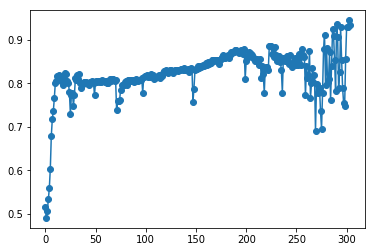

In [147]:
plt.plot(history1.epoch,history1.history['val_acc'],'-o')
plt.show()
#plt.scatter(x=history1.epoch,y=history1.history['val_acc'])
#plt.show()

In [73]:
def plotplot(history):
    plt.plot(x=history.epoch,y=history.history['val_acc'])
    

In [ ]:
m.det()